In [226]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# read my data
df1 = pd.read_csv("scraping/AMD/2018.12.04__2015.12.04/AMD.csv")
df2 = pd.read_csv("scraping/AVGO/2018.12.04__2015.12.04/AVGO.csv")
df3 = pd.read_csv("scraping/MU/2018.12.04__2015.12.04/MU.csv")
df4 = pd.read_csv("scraping/PLAB/2018.12.04__2015.12.04/PLAB.csv")
df5 = pd.read_csv("scraping/TSM/2018.12.04__2015.12.04/TSM.csv")
df6 = pd.read_csv("scraping/XPER/2018.12.04__2015.12.04/XPER.csv")
print(df1)
# transform the datetime (optional)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])
df6['Date'] = pd.to_datetime(df6['Date'])

# drop the unused features
df1.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)
df2.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)
df3.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)
df4.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)
df5.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)
df6.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Open'], axis=1, inplace=True)


# add new col with  day count (the earliest day being day 1 (2015-12-03))
# and the last (2018-12-03)
df1.insert(0, 'Day_count', range(len(df1), 0, -1))
df2.insert(0, 'Day_count', range(len(df2), 0, -1))
df3.insert(0, 'Day_count', range(len(df3), 0, -1))
df4.insert(0, 'Day_count', range(len(df4), 0, -1))
df5.insert(0, 'Day_count', range(len(df5), 0, -1))
df6.insert(0, 'Day_count', range(len(df6), 0, -1))

            Date   Open   High    Low  Close  Adj Close       Volume
0    Dec 03 2018  22.48  23.75  22.37  23.71      23.71  139255800.0
1    Nov 30 2018  21.30  21.36  20.52  21.30      21.30   82370700.0
2    Nov 29 2018  21.19  21.61  20.73  21.43      21.43   79853700.0
3    Nov 28 2018  21.82  21.88  20.18  21.34      21.34  134425300.0
4    Nov 27 2018  19.77  21.45  19.73  21.05      21.05  119230100.0
5    Nov 26 2018  19.96  20.19  19.11  20.08      20.08   82965000.0
6    Nov 23 2018  18.61  19.83  18.56  19.38      19.38   54611300.0
7    Nov 21 2018  20.05  20.31  18.50  18.73      18.73   81585600.0
8    Nov 20 2018  17.40  19.58  17.18  19.21      19.21  109869400.0
9    Nov 19 2018  20.40  20.59  19.09  19.11      19.11   93578200.0
10   Nov 16 2018  19.87  20.97  19.72  20.66      20.66  112376600.0
11   Nov 15 2018  20.72  21.77  20.42  21.49      21.49   97715500.0
12   Nov 14 2018  20.18  21.11  19.76  20.81      20.81  106344300.0
13   Nov 13 2018  19.28  20.02  18

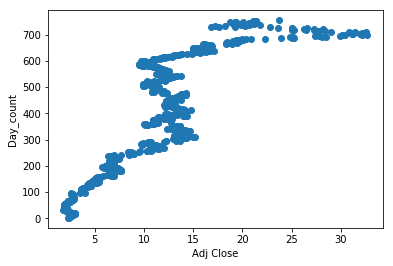

('Weight :', -2.2655785331602238e-14)
('Bias: ', 378.0000000000002)
('accuracy: ', 0.7712292178583443)


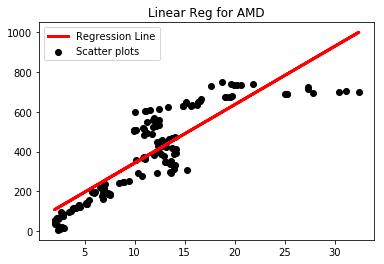

('mse for polynomial reg: ', 7325.5607571424825)
('r^2 for polynomial reg: ', 0.8521250050081581)


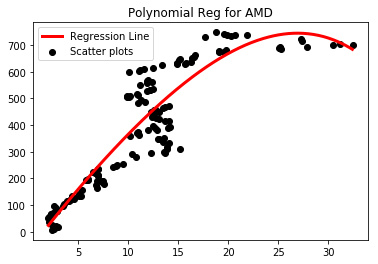

In [71]:
# Graph for the first  company AMD
fig, ax = plt.subplots()
plt.scatter(df1['Adj Close'], df1['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
X = df1.iloc[:, 1].values.reshape(-1,1)
y = df1.iloc[:, 0].values.reshape(-1,1)


# weight and bias
weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
print("Weight :", weight)
bias = np.mean(Y)-np.mean(X)*weight
print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
plt.title('Linear Reg for AMD')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

# Polynomial reg
model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for AMD')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()



('r^2 for SVR: ', 0.8239343301955481)


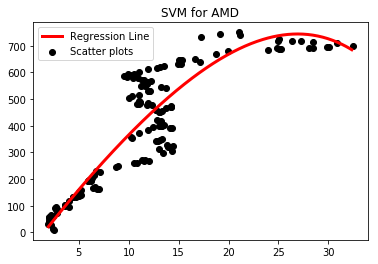

In [129]:
#SVM 1
array = np.array(df1)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=10, degree=3, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('SVM for AMD')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

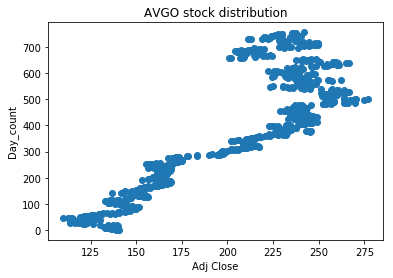

('accuracy: ', 0.788043878703879)


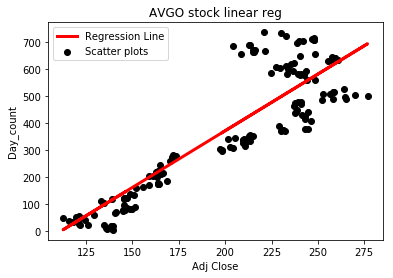

('mse for polynomial reg: ', 9605.811483142325)
('r^2 for polynomial reg: ', 0.8182795176726421)


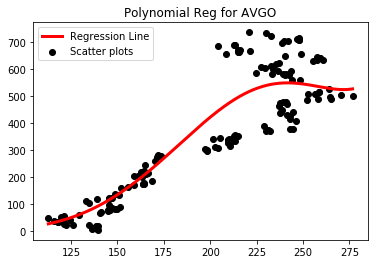

In [146]:
# Graph for the second  company AVGO
fig, ax = plt.subplots()
plt.title('AVGO stock distribution')
plt.scatter(df2['Adj Close'], df2['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
array = np.array(df2)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]

# weight and bias
# weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
# print("Weight :", weight)
# bias = np.mean(Y)-np.mean(X)*weight
# print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
fig, ax = plt.subplots()
plt.title('AVGO stock linear reg')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.legend()
plt.show()


model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for AVGO')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()


('r^2 for SVR: ', 0.7012302103273238)


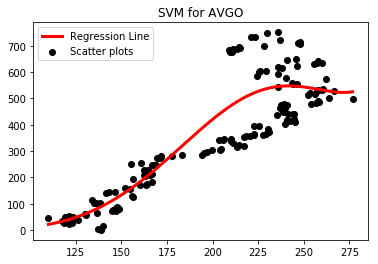

In [161]:
#SVM AVGO
array = np.array(df2)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=100, degree=3, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('SVM for AVGO')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()


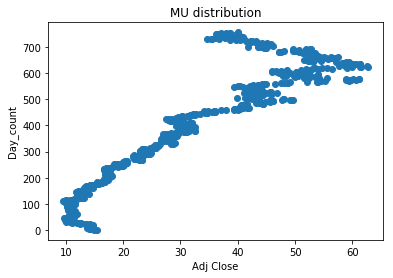

('accuracy: ', 0.8680529702399175)


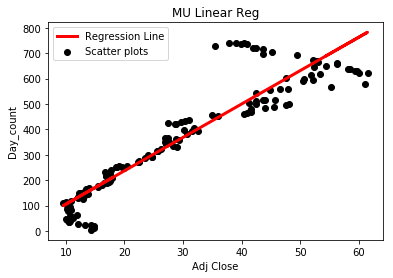

('mse for polynomial reg: ', 4324.0350664856205)
('r^2 for polynomial reg: ', 0.9118746644755966)


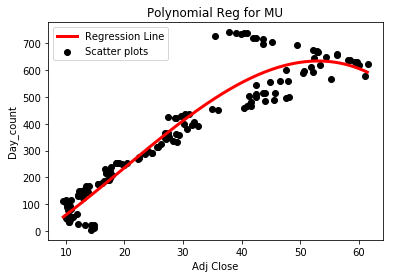

In [174]:
# Graph for the third  company MU
fig, ax = plt.subplots()
plt.title('MU distribution')
plt.scatter(df3['Adj Close'], df3['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
array = np.array(df3)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]

# weight and bias
# weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
# print("Weight :", weight)
# bias = np.mean(Y)-np.mean(X)*weight
# print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
fig, ax = plt.subplots()
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.title('MU Linear Reg')
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.legend()
plt.show()

# Polynomial Dist
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for MU')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

('r^2 for SVR: ', 0.9249914005153005)


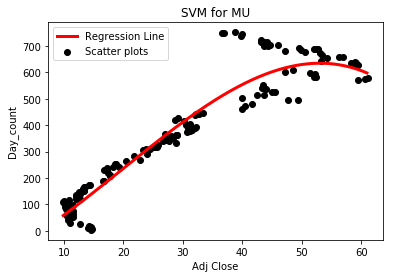

In [180]:
#SVM MU
array = np.array(df3)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=100, degree=5, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.title('SVM for MU')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()


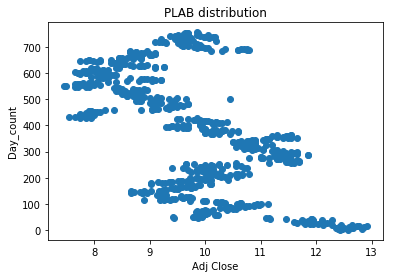

('accuracy: ', 0.26609603552033967)


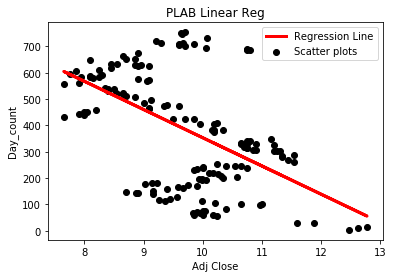

('mse for polynomial reg: ', 32033.304505247153)
('r^2 for polynomial reg: ', 0.30003884042154727)


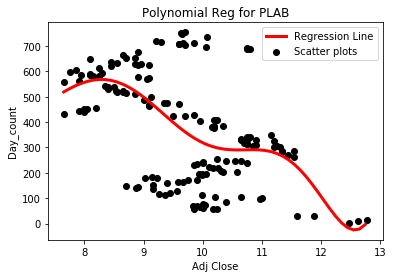

In [187]:
# Graph for the 4th  company PLAB
fig, ax = plt.subplots()
plt.title('PLAB distribution')
plt.scatter(df4['Adj Close'], df4['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
array = np.array(df4)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]

# weight and bias
# weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
# print("Weight :", weight)
# bias = np.mean(Y)-np.mean(X)*weight
# print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
fig, ax = plt.subplots()
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.title('PLAB Linear Reg')
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.legend()
plt.show()

# Polynomial Dist
model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for PLAB')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

('r^2 for SVR: ', 0.3341933030841897)


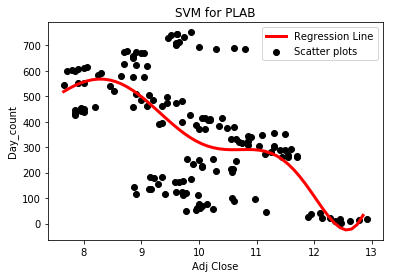

In [194]:
#SVM PLAB
array = np.array(df4)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=1000, degree=7, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.title('SVM for PLAB')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

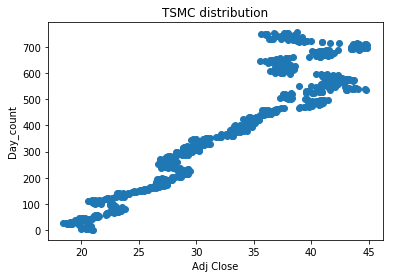

('accuracy: ', 0.8469917781716725)


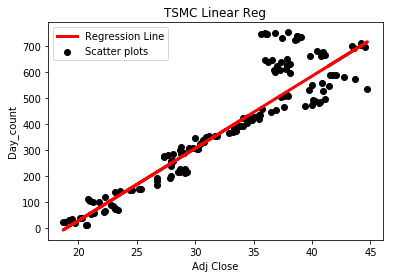

('mse for polynomial reg: ', 5677.521738879208)
('r^2 for polynomial reg: ', 0.8860008677175938)


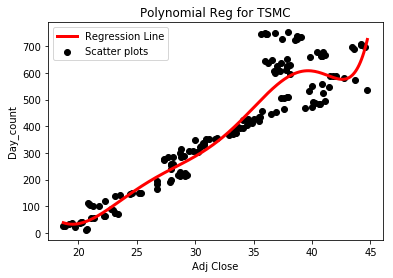

In [202]:
# Graph for the 5th  company TSMC
fig, ax = plt.subplots()
plt.title('TSMC distribution')
plt.scatter(df5['Adj Close'], df5['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
array = np.array(df5)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]

# weight and bias
# weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
# print("Weight :", weight)
# bias = np.mean(Y)-np.mean(X)*weight
# print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
fig, ax = plt.subplots()
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.title('TSMC Linear Reg')
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.legend()
plt.show()

# Polynomial Dist
model = Pipeline([('poly', PolynomialFeatures(degree=8)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for TSMC')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

('r^2 for SVR: ', 0.9342337531407596)


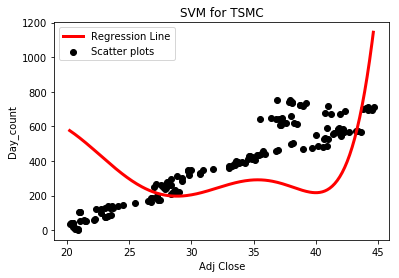

In [222]:
#SVM TSMC
array = np.array(df5)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=100, degree=5, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.title('SVM for TSMC')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()


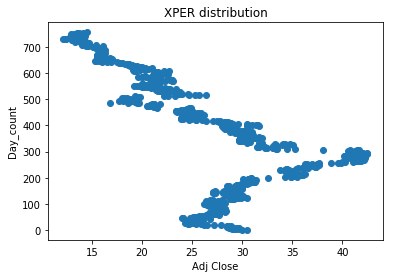

('accuracy: ', 0.3816354902361775)


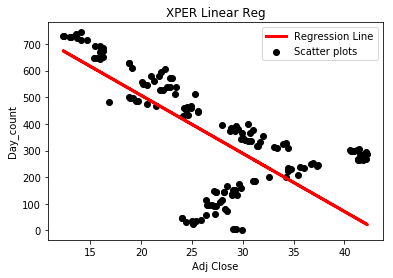

('mse for polynomial reg: ', 13170.416694654183)
('r^2 for polynomial reg: ', 0.7027130326209552)


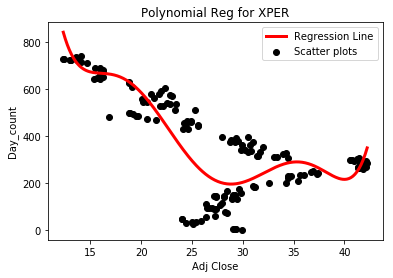

In [215]:
# Graph for the 6th  company XPER
fig, ax = plt.subplots()
plt.title('XPER distribution')
plt.scatter(df6['Adj Close'], df6['Day_count'])
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.show()

# LR
array = np.array(df6)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]

# weight and bias
# weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
# print("Weight :", weight)
# bias = np.mean(Y)-np.mean(X)*weight
# print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
fig, ax = plt.subplots()
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.title('XPER Linear Reg')
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.legend()
plt.show()

# Polynomial Dist
model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression(fit_intercept=False))])




model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
r = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


# PLOT THE GRAPH
fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.title('Polynomial Reg for XPER')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
# test_X = np.linspace(0,1, 151)

plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

('r^2 for SVR: ', 0.7327739567865712)


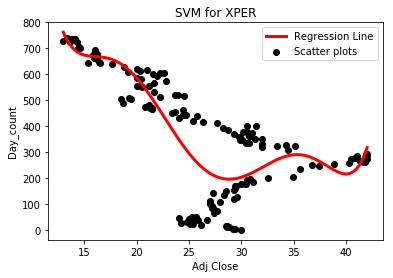

In [224]:
#SVM XPER
array = np.array(df6)
X = array[:,1].reshape(-1, 1)
Y = array[:,0]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

clf = SVR(kernel='rbf', C=100, degree=3, gamma='scale')
pred_y = clf.fit(train_X, train_y).predict(test_X)
r = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print("r^2 for SVR: ", r)

# Plot the graph
X_grid = np.arange(min(test_X), max(test_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

fig, ax = plt.subplots()
ax.set_xlabel('Adj Close')
ax.set_ylabel('Day_count')
plt.title('SVM for XPER')
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(X_grid, model.predict(X_grid), color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

In [14]:
# Apply SVM
